In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date 

# today() to get current date
todays_date = date.today()

print("Date of Analysis=", todays_date)

# Loading time series tide data into a Pandas Data Frame 
data = pd.read_csv("Cochin_ENC_2016_hourly.csv", parse_dates=True)
data.columns = ['Date_and_Time', 'Tide']
data['Date_and_Time'] = pd.to_datetime(data['Date_and_Time'], format = "%m-%d-%Y %H:%M")
data = data.sort_values(by = "Date_and_Time")



Date of Analysis= 2023-07-25


In [39]:
data.head()

,Date_and_Time,Tide
95,2016-01-01 00:00:00,1.024
96,2016-01-01 01:00:00,1.030
97,2016-01-01 02:00:00,1.005
98,2016-01-01 03:00:00,0.899
99,2016-01-01 04:00:00,0.775


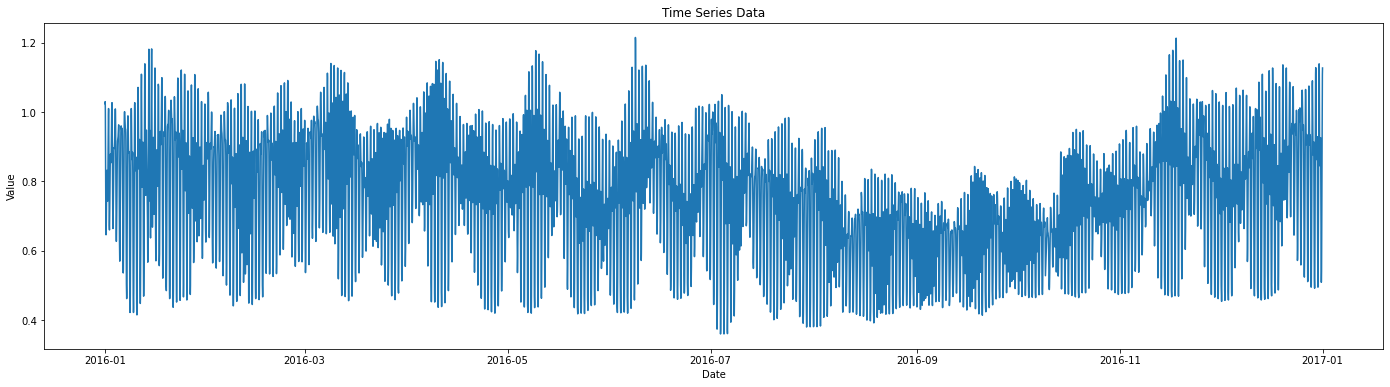

In [41]:
# Plot the time series data
plt.figure(figsize=(24,6))
plt.plot(data['Date_and_Time'],data['Tide'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

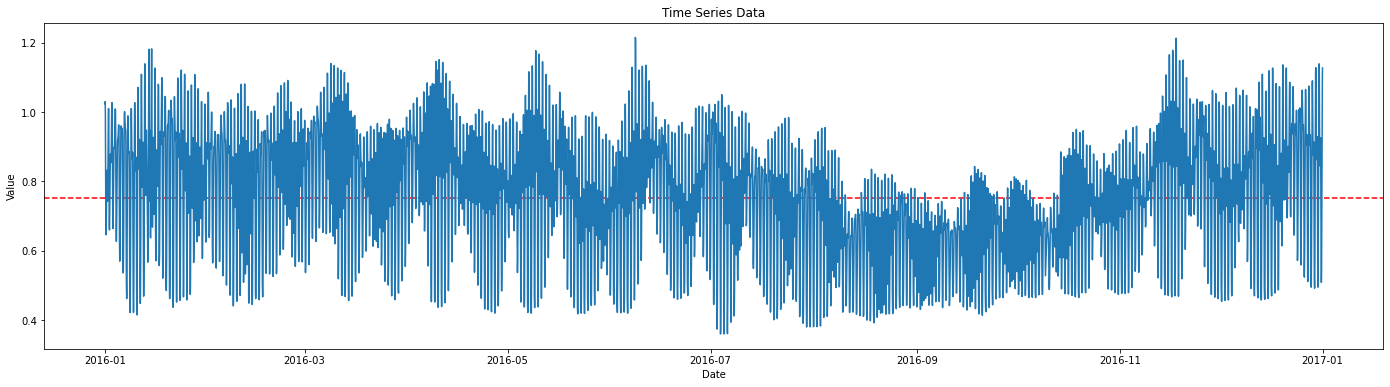

In [42]:
x = data.xs('Date_and_Time', axis = 1)
y = data.Tide
plt.figure(figsize=(24,6))

mean_tide = 0.7520001171508892
plt.axhline(y = mean_tide, color = 'r', linestyle = '--')

plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(x, y)
plt.show()

In [43]:
print(data['Tide'].min())
print(data['Tide'].max())
print(data['Tide'].mean())
print(data)

0.36
1.215
0.7520001171508892
           Date_and_Time   Tide
95   2016-01-01 00:00:00  1.024
96   2016-01-01 01:00:00  1.030
97   2016-01-01 02:00:00  1.005
98   2016-01-01 03:00:00  0.899
99   2016-01-01 04:00:00  0.775
...                  ...    ...
8414 2016-12-31 19:00:00  0.837
8415 2016-12-31 20:00:00  0.946
8416 2016-12-31 21:00:00  1.043
8417 2016-12-31 22:00:00  1.108
8418 2016-12-31 23:00:00  1.127

[8536 rows x 2 columns]


<Figure size 1728x432 with 0 Axes>

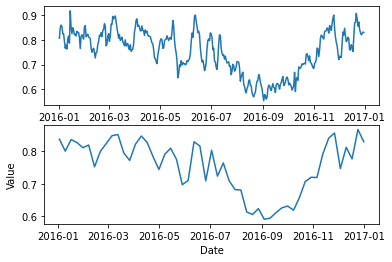

In [44]:
# Resample the time series data to a lower frequency
daily_data = data.resample('D', on = "Date_and_Time").mean()
weekly_data = data.resample('W', on = "Date_and_Time").mean()

#Plot the resampled data
plt.figure(figsize=(24,6))
fig, axs = plt.subplots(2)
axs[0].plot(daily_data)
axs[1].plot(weekly_data)
#plt.title('Daily Resampled Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

C:\Users\incois\AppData\Local\Temp\ipykernel_8520\3706746709.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date_and_Time'], dtype='object')
  rolling_data = data.rolling(window=25).mean()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8536 entries, 95 to 8418
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tide    8512 non-null   float64
dtypes: float64(1)
memory usage: 133.4 KB


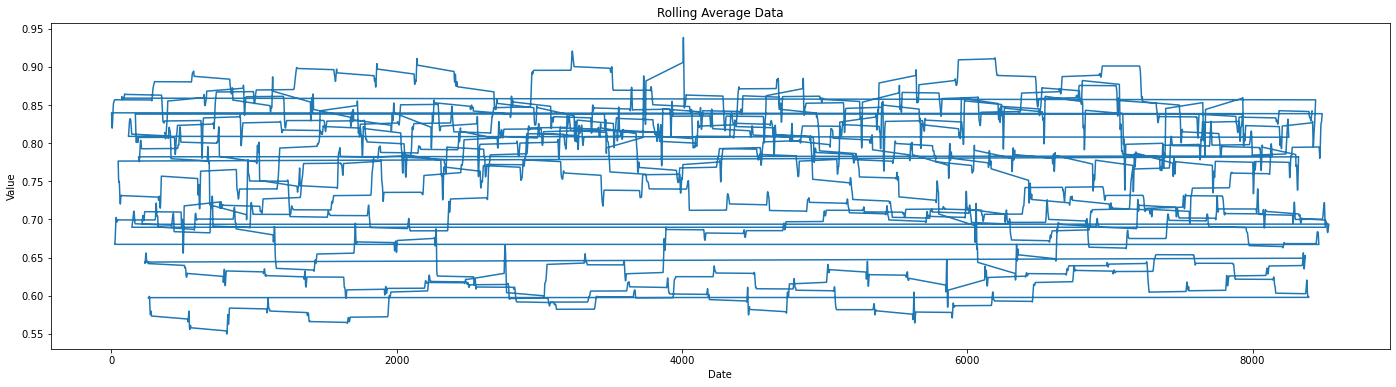

In [45]:
# Perform a rolling average on the time series data
rolling_data = data.rolling(window=25).mean()

rolling_data.info()

# Plot the rolling average data
plt.figure(figsize=(24,6))
plt.plot(rolling_data)
plt.title('Rolling Average Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [46]:
data.set_index('Date_and_Time')

,Tide
Date_and_Time,
2016-01-01 00:00:00,1.024
2016-01-01 01:00:00,1.030
2016-01-01 02:00:00,1.005
2016-01-01 03:00:00,0.899
2016-01-01 04:00:00,0.775
...,...
2016-12-31 19:00:00,0.837
2016-12-31 20:00:00,0.946
2016-12-31 21:00:00,1.043


In [47]:
data.tail()

,Date_and_Time,Tide
8414,2016-12-31 19:00:00,0.837
8415,2016-12-31 20:00:00,0.946
8416,2016-12-31 21:00:00,1.043
8417,2016-12-31 22:00:00,1.108
8418,2016-12-31 23:00:00,1.127


In [ ]:
# Perform a time series decomposition on the data
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data, model='additive')

# Plot the decomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading time series data into a Pandas DataFrame
data = pd.read_csv('time_series_data.csv', index_col=0, parse_dates=True)

# Plot the time series data
plt.plot(data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Resample the time series data to a lower frequency
weekly_data = data.resample('D').mean()

# Plot the resampled data
plt.plot(weekly_data)
plt.title('Weekly Resampled Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Perform a rolling average on the time series data
rolling_data = data.rolling(window=30).mean()

# Plot the rolling average data
plt.plot(rolling_data)
plt.title('Rolling Average Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Perform a time series decomposition on the data
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

# Plot the decomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'time_series_data.csv'